In [1]:
import pandas as pd
filepath = "./OxCGRT_Download_090420_130831_Full.csv"
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

data = pd.read_csv(filepath)
columns = data.columns
filter_header = [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
header = [c for i, c in zip(filter_header, columns) if i]
data = data[header]
data.columns = ['country', 'date', 's1', 'b1', 's2', 'b2', 's3', 'b3', 's4', 'b4', 's6', 'b6', 's7']
data = data.fillna(0)

def important_decision(row, prev_row):
    # return row[0] == 2 and row[1] == 1 and (prev_row[0] < 2 or prev_row[1] < 1)
    return row == 2 and prev_row < 2

def last_imp_decision(row, prev_row):
    return row == 3 and prev_row < 3

def keep(row, prev_row):
    return row[0] == prev_row[0] and (important_decision(row[2], prev_row[2]) or \
                                 important_decision(row[4], prev_row[4]) or \
                                 important_decision(row[6], prev_row[6]) or \
                                 important_decision(row[8], prev_row[8]) or \
                                 important_decision(row[10], prev_row[10]) or \
                                 last_imp_decision(row[12], prev_row[12]))
                                 #(important_decision(row[[2,3]], prev_row[[2,3]]) or \
                                 #important_decision(row[[4,5]], prev_row[[4,5]]) or \
                                 #important_decision(row[[6,7]], prev_row[[6,7]]) or \
                                 #important_decision(row[[8,9]], prev_row[[8,9]]) or \
                                 #important_decision(row[[10,11]], prev_row[[10,11]]) or \
                                 #last_imp_decision(row[12], prev_row[12]))
        
data_index = []
for i in range(1, len(data)):
    if keep(data.iloc[i], data.iloc[i-1]):
        data_index.append(i)
data = data.iloc[data_index]

data

,country,date,s1,b1,s2,b2,s3,b3,s4,b4,s6,b6,s7
75,Aruba,20200316,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
80,Aruba,20200321,2.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,0.0,3.0
110,Aruba,20200420,2.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0
213,Afghanistan,20200301,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
214,Afghanistan,20200302,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
236,Afghanistan,20200324,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0
238,Afghanistan,20200326,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0
239,Afghanistan,20200327,2.0,1.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0
325,Angola,20200301,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0
348,Angola,20200324,2.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0


In [2]:
import numpy as np

def find_dates(country_rows):
    
    row = [country_rows.iloc[0][0]]
    for i in range(5):
        count = 0
        for _, r in country_rows.iterrows():
            if r[i*2+2]==2: # and r[i*2+3]==1:
                break
            count +=1
        if count < len(country_rows):
            row.append(country_rows.iloc[count][1])
        else:
            row.append(np.nan)
            
    # special case
    count = 0
    for _, r in country_rows.iterrows():
        if r[12]==3:
            break
        count +=1
    if count < len(country_rows):
        row.append(country_rows.iloc[count][1])
    else:
        row.append(np.nan)
    
    return row        

In [3]:
data_country = data['country'].unique()
header = ['country', 'school', 'workplace', 'events', 'transport', 'national', 'international']
new_data = pd.DataFrame(columns=header)

for country in data_country:
    country_row = data.loc[data['country'] == country]
    new_country_row = find_dates(country_row)
    
    new_country_row = pd.DataFrame([new_country_row], columns=header)
    new_data = new_data.append(new_country_row, ignore_index=True)

new_data

,country,school,workplace,events,transport,national,international
0,Aruba,20200316,20200420,20200321,NaN,20200321,20200316
1,Afghanistan,20200302,20200326,20200301,20200327,20200324,NaN
2,Angola,20200324,20200327,20200324,NaN,20200327,20200301
3,United Arab Emirates,20200301,20200325,20200316,20200326,20200326,20200224
4,Argentina,20200316,20200316,20200313,20200320,20200320,20200316
5,Australia,20200322,20200324,20200318,NaN,20200319,20200201
6,Austria,20200312,20200316,20200311,NaN,20200313,20200309
7,Burundi,NaN,NaN,NaN,NaN,NaN,20200320
8,Belgium,20200314,20200314,20200314,NaN,20200318,20200317
9,Burkina Faso,20200316,20200322,20200312,20200321,20200316,NaN


In [4]:
import os
import csv

def write_dataset(dataset, filepath):
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    data_file = open(filepath, mode='w')
    file_writer = csv.writer(data_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    file_writer.writerow(dataset.columns)
    for _, d in dataset.iterrows():
        file_writer.writerow(d)
    data_file.close()
    
filepath_new_data_csv = "./gov_responses.csv"
write_dataset(new_data, filepath_new_data_csv)

In [5]:
def convert_to_date(data):
    return pd.to_datetime(data, format='%Y%m%d', errors='ignore')

def prepare_gov_response(fp):
    gov = pd.read_csv(fp, index_col='country')
    gov = gov.fillna("21001231")
    gov = gov.astype(int)
    for h in gov.columns:
        gov[h] = pd.to_datetime(gov[h], format='%Y%m%d')
    return gov

def comparison(c1, c2, data):
    a = data[c1] < data[c2]
    b = data[c1] == data[c2]
    c = data[c1] > data[c2]
    print("{} closed before / same time / after {}: {} / {} / {}".format(c1, c2, np.count_nonzero(a),
                                                                        np.count_nonzero(b), np.count_nonzero(c)))

gov_responses = prepare_gov_response(filepath_new_data_csv)
header = gov_responses.columns
for i in range(len(header)):
    for j in range(i+1, len(header)):
        comparison(header[i], header[j], gov_responses)

school closed before / same time / after workplace: 88 / 21 / 13
school closed before / same time / after events: 39 / 31 / 52
school closed before / same time / after transport: 104 / 10 / 8
school closed before / same time / after national: 90 / 14 / 18
school closed before / same time / after international: 57 / 15 / 50
workplace closed before / same time / after events: 8 / 29 / 85
workplace closed before / same time / after transport: 65 / 39 / 18
workplace closed before / same time / after national: 49 / 31 / 42
workplace closed before / same time / after international: 33 / 11 / 78
events closed before / same time / after transport: 104 / 16 / 2
events closed before / same time / after national: 88 / 22 / 12
events closed before / same time / after international: 57 / 17 / 48
transport closed before / same time / after national: 19 / 38 / 65
transport closed before / same time / after international: 10 / 14 / 98
national closed before / same time / after international: 21 / 14 /

In [11]:
first_level_closure = pd.DataFrame(columns=['country', 'date'])

for ind, gov in gov_responses.iterrows():
    max_date = max([gov['school'], gov['events'], gov['international']])
    row = [ind, max_date if max_date < pd.to_datetime("21001231", format='%Y%m%d') else np.nan]
    
    new_country_row = pd.DataFrame([row], columns=['country', 'date'])
    first_level_closure = first_level_closure.append(new_country_row, ignore_index=True)

# some adjustments...
first_level_closure.loc[first_level_closure['country'] == 'China', 'date'] = pd.to_datetime("20200126", 
                                                                                            format='%Y%m%d')
first_level_closure.loc[first_level_closure['country'] == 'Iran', 'date'] = pd.to_datetime("20200222", 
                                                                                            format='%Y%m%d')
first_level_closure.loc[first_level_closure['country'] == 'United Kingdom', 'date'] = pd.to_datetime("20200323", 
                                                                                            format='%Y%m%d')
first_level_closure.loc[first_level_closure['country'] == 'Sweden', 'date'] = pd.to_datetime("20200319", 
                                                                                            format='%Y%m%d')
first_level_closure.loc[first_level_closure['country'] == 'Ireland', 'date'] = pd.to_datetime("20200320", 
                                                                                            format='%Y%m%d')
first_level_closure.loc[first_level_closure['country'] == 'Ecuador', 'date'] = pd.to_datetime("20200329", 
                                                                                            format='%Y%m%d')
first_level_closure

,country,date
0,Aruba,2020-03-21
1,Afghanistan,NaT
2,Angola,2020-03-24
3,United Arab Emirates,2020-03-16
4,Argentina,2020-03-16
5,Australia,2020-03-22
6,Austria,2020-03-12
7,Burundi,NaT
8,Belgium,2020-03-17
9,Burkina Faso,NaT


In [12]:
from ipynb.fs.defs.first import get_novel, get_top_countries
N_COUNTRIES = 20
filepath = "./novel-corona-virus-2019-dataset/time_series_covid19_confirmed_global.csv"

confirmed = get_novel(filepath)
confirmed = confirmed.set_index('Country/Region')
confirmed = get_top_countries(confirmed, N_COUNTRIES)

In [13]:
confirmed = confirmed.rename(index={'Korea, South': 'South Korea'})
confirmed = confirmed.rename(index={'US': 'United States'})

for c in confirmed.index:
    if c not in list(first_level_closure['country']):
        print("{} not in new dataset".format(c))
        
# empty new dataset
header = [i for i in range(confirmed.shape[1])]
header.insert(0, "country")
new_data_flc = pd.DataFrame(columns=header)

# populate new dataset -> it contains the cumulative daily number of confirmed after the reaching of 100 cases.
for ind, row in confirmed.iterrows():
    date_flc = first_level_closure[first_level_closure['country']==ind]['date']
    if not pd.isnull(date_flc.item()):
        days = date_flc - pd.to_datetime('20200122', format='%Y%m%d')
        days = days.item().days
        new_row = list(row[days:])
        for _ in range(days):
            new_row.append(-1)
    else:
        new_row = []
        for _ in range(len(header)-1):
            new_row.append(-1)
    
    new_row.insert(0, ind)
    new_row = pd.DataFrame([new_row], columns=header)
    new_data_flc = new_data_flc.append(new_row, ignore_index=True)

new_data_flc

,country,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,United States,2727,3499,4632,6421,7783,13747,19273,25600,33276,43843,53736,65778,83836,101657,121465,140909,161831,188172,213242,243622,275367,308650,336802,366317,397121,428654,462780,496535,526396,555313,580619,607670,636350,667592,699706,732197,758809,784326,811865,840351,869170,905358,938154,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,Spain,1695,2277,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374,28768,35136,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065,119199,126168,131646,136675,141942,148220,153222,158273,163027,166831,170099,172541,177644,184948,190839,191726,198674,200210,204178,208389,213024,219764,223759,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,Italy,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948,132547,135586,139422,143626,147577,152271,156363,159516,162488,165155,168941,172434,175925,178972,181228,183957,187327,189973,192994,195351,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,France,9124,10970,12758,14463,16243,20123,22622,25600,29551,33402,38105,40708,45170,52827,57749,59929,65202,69500,71412,75343,79163,83057,87366,91738,94863,121712,125394,130365,133585,146075,148084,148086,153011,155393,158168,155980,158303,159952,161644,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,Germany,7272,9257,12327,15320,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794,91159,96092,100123,103374,107663,113296,118181,122171,124908,127854,130072,131359,134753,137698,141397,143342,145184,147065,148291,150648,153129,154999,156513,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,United Kingdom,6726,8164,9640,11812,14745,17312,19780,22453,25481,29865,34173,38689,42477,48436,52279,55949,61474,65872,74605,79874,85206,89570,94845,99483,104145,109769,115314,121172,125856,130172,134638,139246,144640,149569,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,Turkey,18,47,98,192,359,670,1236,1529,1872,2433,3629,5698,7402,9217,10827,13531,15679,18135,20921,23934,27069,30217,34109,38226,42282,47029,52167,56956,61049,65111,69392,74193,78546,82329,86306,90980,95591,98674,101790,104912,107773,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,Iran,28,43,61,95,139,245,388,593,978,1501,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991,16169,17361,18407,19644,20610,21638,23049,24811,27017,29406,32332,35408,38309,41495,44605,47593,50468,53183,55743,58226,60500,62589,64586,66220,68192,70029,71686,73303,74877,76389,77995,79494,80868,82211,83505,84802,85996,87026,88194,89328,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,China,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,7

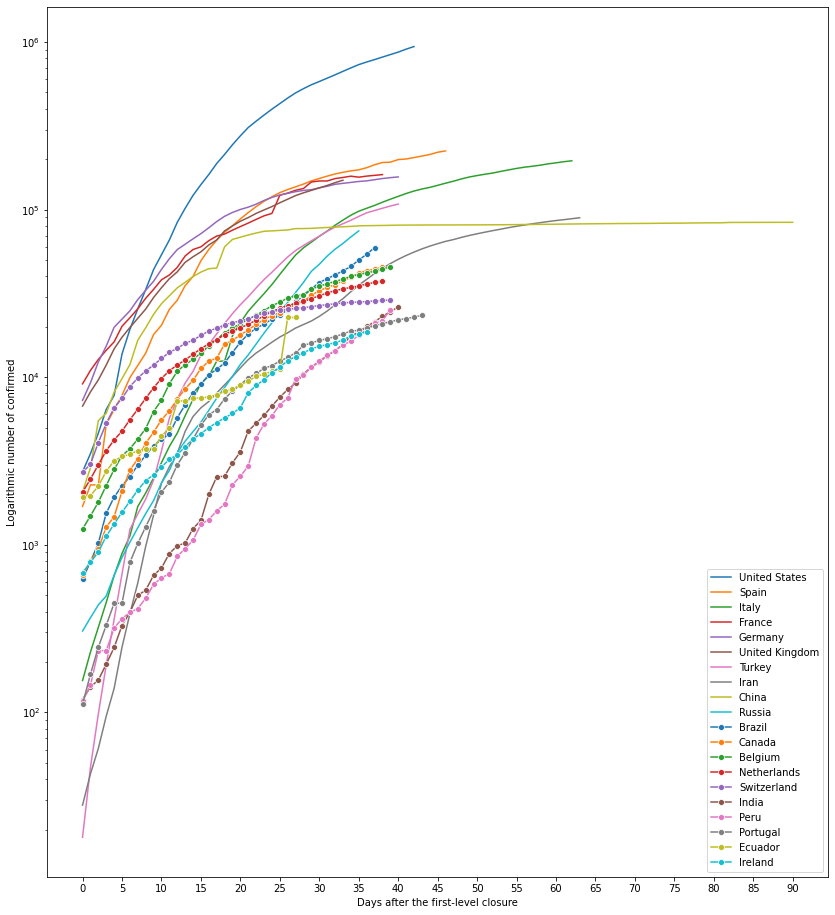

In [14]:
from ipynb.fs.defs.first import plot
import matplotlib.pyplot as plt
import seaborn as sns

# prepare new_data
new_data = new_data_flc.set_index('country')
new_data = new_data.astype(int)

# plot
fig = plt.figure(figsize=(14,16))
plt.yscale('log')
plt.xlabel("Days after the first-level closure")
plt.ylabel("Logarithmic number of confirmed")
plt.xticks(np.arange(0, len(new_data.columns), step=5))
plot(new_data)

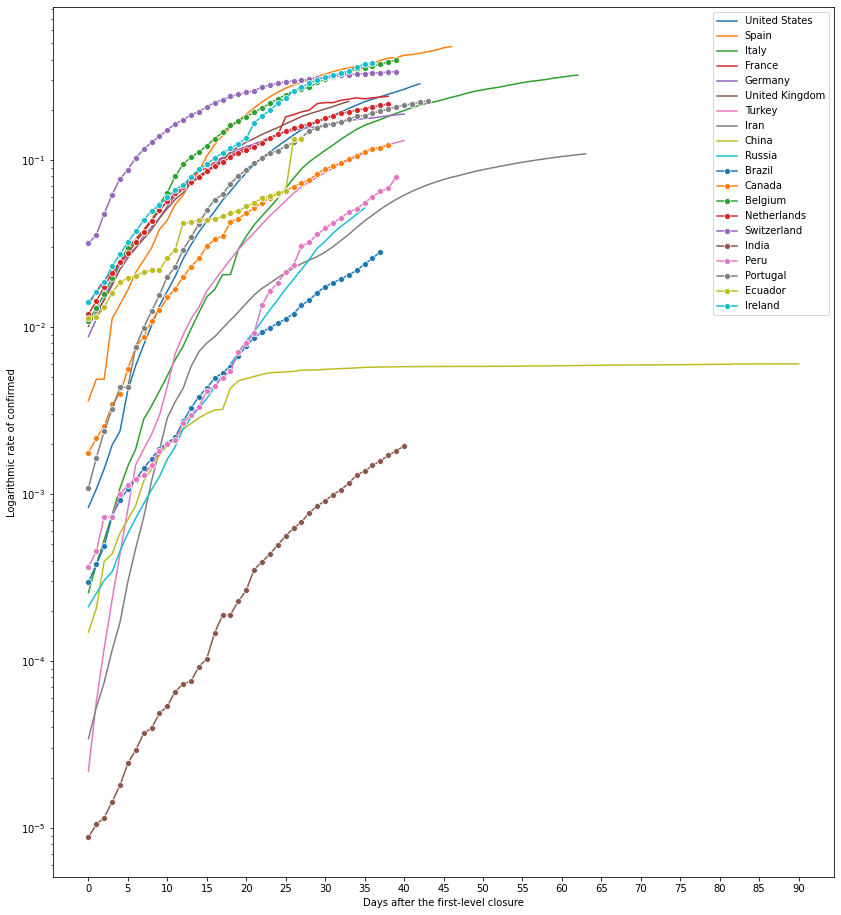

In [15]:
new_data_rate = new_data

# get population for every country in new_data
filepath_population = "./API_SP.POP.TOTL_DS2_en_csv_v2_887275/API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv"
pop = pd.read_csv(filepath_population)
pop = pop[['Country Name', '2018']]
pop = pop.set_index('Country Name')

pop = pop.rename(columns={'2018': 'population'})
pop = pop.rename(index={'Russian Federation': 'Russia'})
pop = pop.rename(index={'Iran, Islamic Rep.': 'Iran'})
pop = pop.rename(index={'Korea, Rep.': 'South Korea'})

# compute percentage of confirmed for each country
for index_to_divide, row_to_divide in new_data_rate.iterrows():
    try:
        new_data_rate.loc[index_to_divide] = row_to_divide.map(lambda x: (100*x)/pop.loc[index_to_divide, 'population'])
    except:
        print("Impossible to get the population number for {}".format(index_to_divide))

# new_data_rate
# plot
fig = plt.figure(figsize=(14,16))
plt.yscale('log')
plt.xlabel("Days after the first-level closure")
plt.ylabel("Logarithmic rate of confirmed")
plt.xticks(np.arange(0, len(new_data_rate.columns), step=5))
plot(new_data_rate)